In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_path = pd.read_csv("data/city_data.csv")
ride_path = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merged_data = pd.merge(city_path, ride_path, on='city')
#pd.merge(df_new, df_n, on='subject_id')
merged_data.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

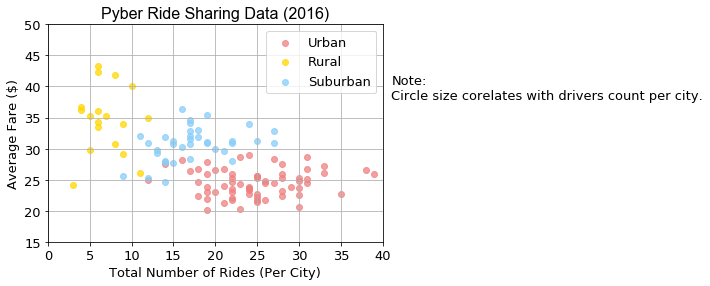

In [15]:
# Obtain the x and y coordinates for each of the three city types
urban_df = merged_data[merged_data['type']=="Urban"]
rural_df = merged_data[merged_data['type']=="Rural"]
suburban_df = merged_data[merged_data['type']=="Suburban"]

# gapminder[gapminder['year']==2002]
x_axis_urban = urban_df.groupby(['city']).count()['ride_id']
x_axis_rural = rural_df.groupby(['city']).count()['ride_id']
y_axis_urban = urban_df.groupby(['city']).mean()['fare']
y_axis_rural = rural_df.groupby(['city']).mean()['fare']
x_axis_suburban = suburban_df.groupby(['city']).count()['ride_id']
y_axis_suburban = suburban_df.groupby(['city']).mean()['fare']


# Build the scatter plots for each city types
colors = {'Urban':'lightcoral', 'Rural':'gold', 'Suburban':'lightskyblue'}
plt.scatter(x_axis_urban, y_axis_urban, color = colors['Urban'],  label = 'Urban', alpha = .75)
plt.scatter(x_axis_rural, y_axis_rural, color = colors['Rural'],  label = 'Rural', alpha = .75)
plt.scatter(x_axis_suburban, y_axis_suburban, color = colors['Suburban'],  label = 'Suburban', alpha = .75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)",{'fontname':'Arial','fontsize':16})
plt.xlim(0,40)
plt.ylim(15,50)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)


# legend
plt.legend(loc='upper right')


# Incorporate a text label regarding circle size
figtext(.92, .62, "Note:\nCircle size corelates with drivers count per city.", rotation='horizontal')

# Save Figure
plt.savefig("Images/Pyber_Ride_Sharing.png")

# Show plot
plt.show()

## Total Fares by City Type

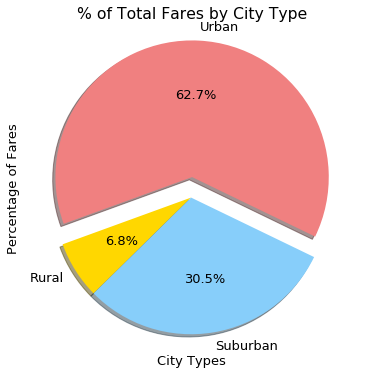

In [13]:
# Calculate Type Percents
TypeMerged = merged_data.groupby("type")
TypeCity = city_path.groupby("type")
TotalFare = TypeMerged["fare"].sum() / merged_data["fare"].sum()


# Build Pie Chart
explode = (0, 0, 0.15)
labels = TotalFare.index.tolist()
colors = ["gold","lightskyblue","lightcoral"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(TotalFare, labels = labels, explode = explode, colors = colors, startangle = 200, shadow = True, autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Fares")

# Save Figure
plt.savefig("Images/Total Fares by City.png")

#pie chart display
plt.show()


## Total Rides by City Type

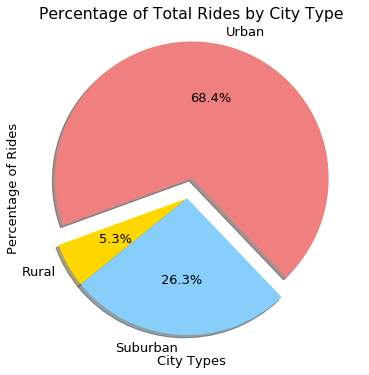

In [11]:
# Calculate Ride Percents
TotalRides = TypeMerged["ride_id"].count() / merged_data["ride_id"].count()

# Build Pie Chart
explode = (0, 0, 0.15)
labels = TotalRides.index.tolist()
colors = ["gold","lightskyblue","lightcoral"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(TotalRides, labels = labels, explode = explode, colors = colors, startangle = 200, shadow = True, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Rides")

# Save Figure
plt.savefig("Images/Total Rides by City.png")

plt.show()

## Total Drivers by City Type

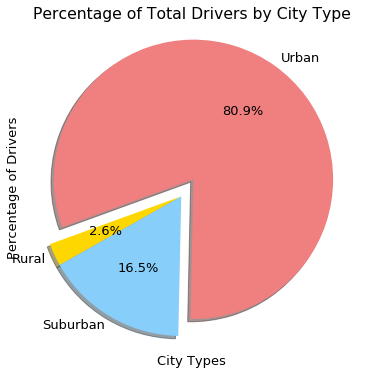

In [12]:
# Calculate Driver Percents
TotalDriver = TypeCity["driver_count"].sum()/city_path["driver_count"].sum()

# Build Pie Charts
explode = (0, 0, 0.15)
labels = TotalDriver.index.tolist()
colors = ["gold","lightskyblue","lightcoral"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(TotalDriver, labels = labels, explode = explode, colors = colors, startangle = 200, shadow = True, autopct="%1.1f%%", labeldistance=1.07)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Drivers")

# Save Figure
plt.savefig("Images/Total Drivers by City.png")

plt.show()


In [ ]:
Observations:
    1) The highest percentage of Total Drivers, Total Fares and Total Rides are from Urban Cities
    2) Urban cities have the lowest avg fares and the highest total number of rides of all three types.
    3) Rural cities have the highest avg fares and the lowest total number of rides of all three types.